LSTM
explained_variance_score:0.943622
mape:16.996547%
mae:7.041851
mse:92.318145
rmse:9.608233
r2:0.943169
GRU
explained_variance_score:0.942638
mape:16.830512%
mae:7.212163
mse:95.673936
rmse:9.781305
r2:0.941103
SAEs
explained_variance_score:0.944047
mape:17.043089%
mae:7.005815
mse:91.272337
rmse:9.553656
r2:0.943813
BiLSTM
explained_variance_score:0.941444
mape:16.596722%
mae:7.137062
mse:95.336583
rmse:9.764045
r2:0.941311


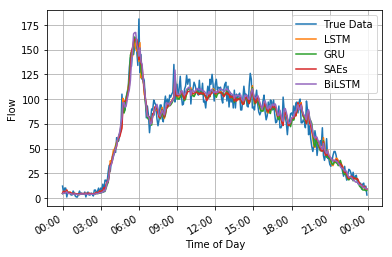

In [7]:
def test():
    lstm = load_model('model/lstm_5.h5', custom_objects={'myloss': myloss})
    gru = load_model('model/gru_5.h5', custom_objects={'myloss': myloss})
    saes = load_model('model/saes_5.h5', custom_objects={'myloss': myloss})
    bi_lstm = load_model('model/bi_lstm_5.h5', custom_objects={'myloss': myloss})
    models = [lstm, gru, saes, bi_lstm]
    names = ['LSTM', 'GRU', 'SAEs', 'BiLSTM']

    lag = 12
    file1 = 'data/train_traffic_flow.csv'
    file2 = 'data/test_traffic_flow.csv'
    _, _, X_test, y_test, scaler = process_data(file1, file2, lag)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

    y_preds = []
    for name, model in zip(names, models):
        if name == 'SAEs':
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
        else:
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        file = 'images/' + name + '.png'
        plot_model(model, to_file=file, show_shapes=True)
        predicted = model.predict(X_test)
        predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
        y_preds.append(predicted[:288])
        print(name)
        evaluation(y_test, predicted)

    plot_results(y_test[: 288], y_preds, names)

test()